Processando base de dados

Vari√°veis: file, alg e min_support

In [1]:
import importlib
import utils.pre_processing_social_media as psm

importlib.reload(psm)

file = "vacinal_2025_05"

input_file = "process_datasets/" + file + ".csv"

# 1. Pr√© processando base de dados
print("Pr√©-processando textos...")
pre_processing_result, txt_database = psm.pre_processing_database(input_file)

Pr√©-processando textos...


Gerando Trie of Rules

Gerando √°rvore de regras (TOR)...


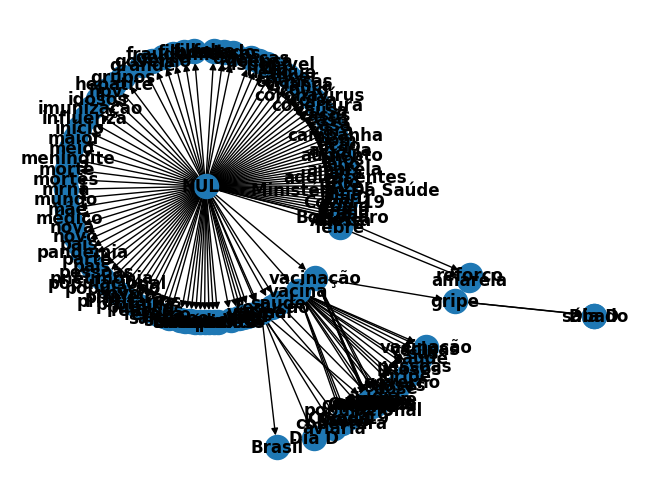

In [2]:
from trieofrules import trieofrules

#supported algorithms: FP-max, FP-growth, Apriori
alg = 'Apriori'
#alg = 'FP-max'
min_support = 0.009

file_name = f"{file}_{alg}_{min_support}"

# 2. Gera o TOR (Trie of Rules) a partir dos dados
print("Gerando √°rvore de regras (TOR)...")
TOR = trieofrules(data=pre_processing_result, alg=alg, min_support=min_support)
TOR.draw()

In [4]:
import os

pasta_output = "outputs"
os.makedirs(pasta_output, exist_ok=True)
output_file = os.path.join(pasta_output, file_name + ".graphml")

# 3. Salva a visualiza√ß√£o e estrutura como .graphml
print("Salvando .graphml...")
TOR.save_graph(filename=output_file)

Salvando .graphml...


In [5]:
import os
import utils.analize_tor as ator
import networkx as nx

pasta = "outputs_clusters"
os.makedirs(pasta, exist_ok=True)

# 5. Separa cluster central dos perif√©ricos
print("Separando cluster central de perif√©ricos...")
G_central, G_perifericos = ator.separar_clusters_por_tamanho(output_file)

# Salva os arquivos
path_cluster_central = os.path.join(pasta, file_name + "_cluster_central.graphml")
path_clusters_perifericos = os.path.join(pasta, file_name + "_clusters_perifericos.graphml")
nx.write_graphml(G_central, path_cluster_central)
nx.write_graphml(G_perifericos, path_clusters_perifericos)

Separando cluster central de perif√©ricos...


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luiza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


An√°lise clusters

In [5]:
import utils.analize_tor as ator
import importlib
importlib.reload(ator)

# 4. Extrai clusters com ramos hier√°rquicos
print("Extraindo clusters e ramos do grafo...")
all_clusters = ator.extrair_clusters(output_file)


Extraindo clusters e ramos do grafo...
Cluster 1 ‚Äî Raiz: dose ‚Äî 2 n√≥s
Ramos: 
dose ‚Üí refor√ßo
Palavras:
refor√ßo
--------------------------------------------------------------------------------
Cluster 2 ‚Äî Raiz: febre ‚Äî 2 n√≥s
Ramos: 
febre ‚Üí amarela
Palavras:
amarela
--------------------------------------------------------------------------------
Cluster 3 ‚Äî Raiz: gripe ‚Äî 5 n√≥s
Ramos: 
gripe ‚Üí s√°bado
gripe ‚Üí avi√°ria
gripe ‚Üí Dia D
gripe ‚Üí Brasil
Palavras:
Dia D, s√°bado, avi√°ria, Brasil
--------------------------------------------------------------------------------
Cluster 4 ‚Äî Raiz: redu√ß√£o ‚Äî 2 n√≥s
Ramos: 
redu√ß√£o ‚Üí populacional
Palavras:
populacional
--------------------------------------------------------------------------------
Cluster 5 ‚Äî Raiz: sa√∫de ‚Äî 2 n√≥s
Ramos: 
sa√∫de ‚Üí sus
Palavras:
sus
--------------------------------------------------------------------------------
Cluster 6 ‚Äî Raiz: vacina ‚Äî 18 n√≥s
Ramos: 
vacina ‚Üí vaci

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luiza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [96]:
import os
import pandas as pd
import importlib

importlib.reload(ator)

pasta = "outputs_clusters_csv"
os.makedirs(pasta, exist_ok=True)

# 5. Relaciona tweets aos clusters
print("Relacionando tweets aos clusters...")
tweets_clusters = ator.tweets_clusters(
    clusters=all_clusters, 
    textos_tokenizados=pre_processing_result, 
    textos_originais=txt_database
)

# Salva tweets relacionados por cluster
print("Salvando resultados...")
for c in tweets_clusters:
    if c["n_tweets"] == 0:
        continue
    nome = c["raiz"].replace(" ", "_")[:30]
    df_cluster = pd.DataFrame(c["tweets"])
    caminho = os.path.join(pasta, f"{file_name}_cluster_{c['cluster_idx']}_{nome}.csv")
    df_cluster.to_csv(caminho, index=False)

print("‚úÖ Pipeline finalizado com sucesso.")

Relacionando tweets aos clusters...
Cluster 1 (Aedes) ‚Äî 7 tweets relacionados
Cluster 2 (Alexandre Padilha) ‚Äî 6 tweets relacionados
Cluster 3 (Brasil) ‚Äî 12 tweets relacionados
Cluster 4 (avi√°ria) ‚Äî 31 tweets relacionados
Cluster 5 (c√¢ncer) ‚Äî 7 tweets relacionados
Cluster 6 (dengue) ‚Äî 9 tweets relacionados
Cluster 7 (fake) ‚Äî 6 tweets relacionados
Cluster 8 (febre) ‚Äî 6 tweets relacionados
Cluster 9 (granja) ‚Äî 6 tweets relacionados
Cluster 10 (gripe) ‚Äî 51 tweets relacionados
Cluster 11 (mosquito) ‚Äî 6 tweets relacionados
Cluster 12 (sa√∫de) ‚Äî 44 tweets relacionados
Cluster 13 (sus) ‚Äî 14 tweets relacionados
Cluster 14 (vacina) ‚Äî 63 tweets relacionados
Cluster 15 (vacina√ß√£o) ‚Äî 13 tweets relacionados
Salvando resultados...
‚úÖ Pipeline finalizado com sucesso.


Sumariza√ß√£o com IA

In [99]:
import importlib
importlib.reload(ator)

cluster = 10
prompt = ator.prompt_IA(all_clusters[cluster-1])
print(prompt)

Considere os tweets a seguir, que foram identificados como relacionados ao assunto gripe. Eles mencionam com frequ√™ncia palavras como: casos, suspeitos, avi√°ria, vacina√ß√£o, frango, aves, Brasil, Rs, granja. Com base nesse conte√∫do, gere um pequeno texto de 1 a 2 par√°grafos, com uma s√≠ntese clara e objetiva sobre o que est√° sendo discutido nos tweets. O texto deve ajudar qualquer pessoa a entender rapidamente o teor das conversas, mesmo que ela n√£o tenha lido os tweets originais. Retorne somente o resumo.


Outras Visualiza√ß√µes

In [6]:
import utils.pre_processing_social_media as psm
importlib.reload(psm)

pre_processing_result_simples, txt_database = psm.pre_processing_database(
    file_path = input_file,
    simples=True
)

In [7]:
print(pre_processing_result_simples)

[['fila', 'osso', 'p√©s', 'galinha', 'carca√ßa', 'frango', 'oxig√™nio', 'enterro', 'atraso', 'compra', 'vacina√ß√£o', 'morte', 'paulo', 'gustavo', 'mundo', 'alegria', 'feij√£o', 'bandinha', 'arroz', 'quebradinho', 'ouro', 'pneu'], ['problema', 'eulavio', 'ost√°quio', 'espanha', 'cart√£o', 'vacina'], ['pa√≠s', 'fraudemia', 'tipo', 'coisas', 'bostil'], ['this', 'corrupt', 'dictator', 'pfizergate', 'freedomofspeech', 'must', 'resign', 'with', 'your', 'permission', 'she', 'destroying', 'our', 'countries', 'economies', 'welfare', 'culture', 'greatreplacement', 'orchestral', 'whole'], ['sa√∫de', 'aparecida', 'campanha', 'vacina√ß√£o', 'gripe', 'segunda', 'di√°rio', 'goi√°s', 'conte√∫do', 'verdade', 'jornalismo', 'profissional'], ['vacina√ß√£o', 'influenza', 'rio', 'partir', 'meses', 'sa√∫de', 'riodejaneiro'], ['minist√©rio', 'sa√∫de', 'compra', 'doses', 'vacina', 'tvcultura', 'covid'], ['vacina', 'gripe', 'preven√ß√£o', 'mato', 'grosso', 'sulcampanha', 'doses', 'influenza', 'prote√ß√£o', 'co

In [9]:
#Nuvem de palavras

import csv
import os
import importlib
import utils.other_visualizations as ovi

importlib.reload(ovi)

pasta_raking = "ranking_palavras"
os.makedirs(pasta_raking, exist_ok=True)

ranking = ovi.ranking_words(pre_processing_result_simples, remove_duplicidades=True)
file_ranking = os.path.join(pasta_raking, f"{file_name}_ranking_palavras.csv")
with open(file_ranking, mode="w", newline="", encoding="utf-8") as arquivo_csv:
    writer = csv.writer(arquivo_csv)
    writer.writerows(ranking)

In [10]:
#Word Tree - Todos os textos como uma string 

print(" ".join(txt_database))

Parabenizo o SUS e agrade√ßo aos trabalhadores da sa√∫de, que t√™m dedicado suas for√ßas contra o Coronav√≠rus. N√£o podemos facilitar! O uso das m√°scaras, do √°lcool em gel e o distanciamento social devem continuar sendo adotados. https://t.co/qIVFyRqNUI A partir da pr√≥xima segunda-feira (6), todos os idosos acima de 60 anos de idade poder√£o receber a vacina Pfizer bivalente contra a Covid-19. A Prefeitura de S√£o Paulo recebeu, nesta quarta-feira (1¬∫), 530.776 doses do imunizante. Anvisa aprovou h√° pouco o uso emergencial da Coronavac. A ger√™ncia-geral de medicamentos acaba de recomendar aprova√ß√£o tamb√©m da vacina da Fiocruz em parceria com Oxford. Um dia hist√≥rico!Nosso reconhecimento aos institutos e ao trabalho s√©rio e t√©cnico da Anvisa! #VemVacinas @Metropoles At√© porque o aumento do gelo √© um negacionismo do gelo em n√£o aceitar os estudos t√©cnicos e cient√≠ficos sobre o aquecimento global. Entendeu?√â o gelo que n√£o usou m√°scara e n√£o tomou vacina com medo de 

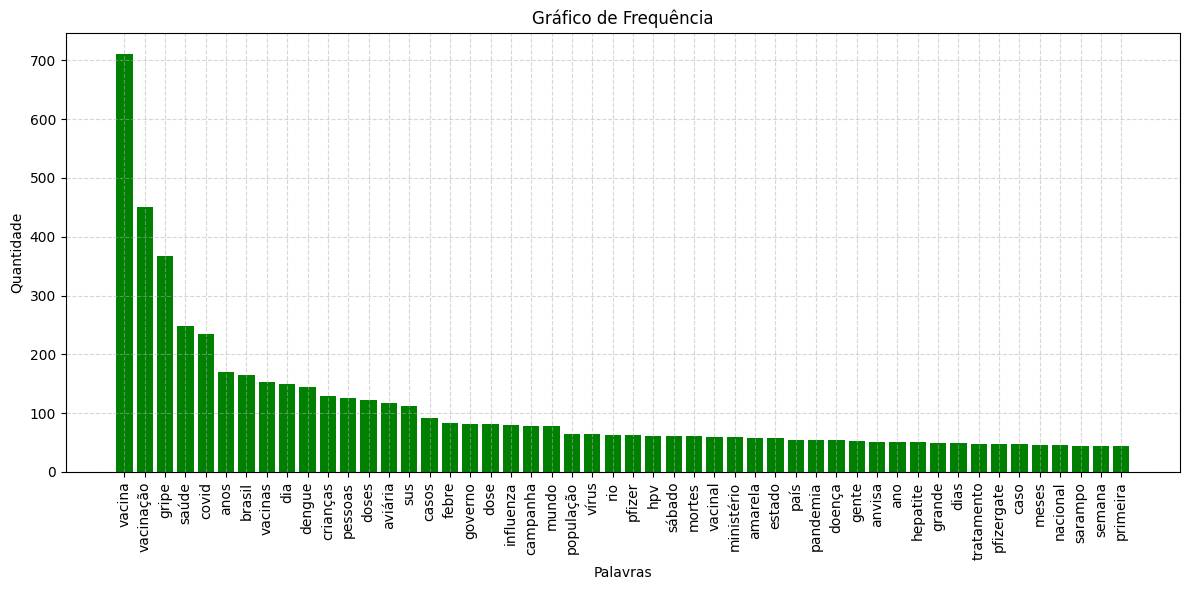

In [11]:
# Gr√°fico de frequ√™ncia

import pandas as pd
import utils.other_visualizations as ovi

importlib.reload(ovi)

df = pd.read_csv(file_ranking, names=['palavra', 'quantidade'])
ovi.scartter_plot_from_ranking(df)


In [12]:
#Grafo de Coocorr√™ncia
import utils.other_visualizations as ovi

importlib.reload(ovi)


pasta_raking = "ranking_palavras"
os.makedirs(pasta_raking, exist_ok=True)

file_grafo = os.path.join(pasta_raking, f"{file_name}_grafo.gdf")
ovi.generate_graph_file(pre_processing_result_simples, file_grafo)
